# Importing Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_travel = pd.read_csv(r'C:\Users\makay\Documents\Data Immersion 6\6.1 assignment.csv',index_col = False)

In [3]:
df_travel.head(20)

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,England,5/1/2023,5/8/2023,7,John Smith,35,Male,American,Hotel,1200,Flight,600.0
1,2,Thailand,6/15/2023,6/20/2023,5,Jane Doe,28,Female,Canadian,Resort,800,Flight,500.0
2,3,Indonesia,7/1/2023,7/8/2023,7,David Lee,45,Male,Korean,Villa,1000,Flight,700.0
3,4,United States of America,8/15/2023,8/29/2023,14,Sarah Johnson,29,Female,British,Hotel,2000,Flight,1000.0
4,5,Japan,9/10/2023,9/17/2023,7,Kim Nguyen,26,Female,Vietnamese,Airbnb,700,Train,200.0
5,6,France,10/5/2023,10/10/2023,5,Michael Brown,42,Male,American,Hotel,1500,Flight,800.0
6,7,Australia,11/20/2023,11/30/2023,10,Emily Davis,33,Female,Australian,Hostel,500,Flight,1200.0
7,8,Brazil,1/5/2024,1/12/2024,7,Lucas Santos,25,Male,Brazilian,Airbnb,900,Flight,600.0
8,9,Netherlands,2/14/2024,2/21/2024,7,Laura Janssen,31,Female,Dutch,Hotel,1200,Train,200.0
9,10,United Arab Emirates,3/10/2024,3/17/2024,7,Mohammed Ali,39,Male,Emirati,Resort,2500,Flight,800.0


In [4]:
df_travel.shape

(137, 13)

In [5]:
#checking missing values
df_travel.isnull().sum()

Trip ID                 0
Destination             0
Start date              0
End date                0
Duration (days)         0
Traveler name           0
Traveler age            0
Traveler gender         0
Traveler nationality    0
Accommodation type      0
Accommodation cost      0
Transportation type     1
Transportation cost     1
dtype: int64

In [6]:
#checking for duplicates
dups = df_travel.duplicated()

In [7]:
dups.shape

(137,)

C:\Users\makay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Duration (days)', ylabel='Density'>

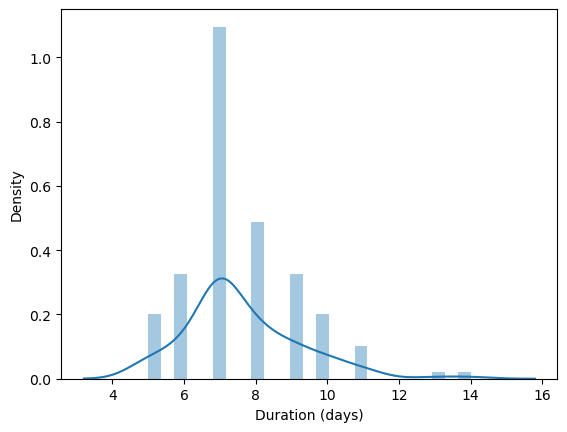

In [8]:
#extreme values
sns.distplot(df_travel['Duration (days)'], bins=25)

C:\Users\makay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Traveler age', ylabel='Density'>

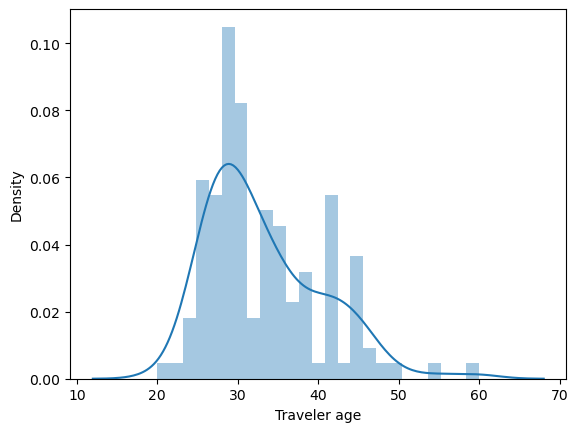

In [9]:
sns.distplot(df_travel['Traveler age'], bins=25)

C:\Users\makay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Accommodation cost', ylabel='Density'>

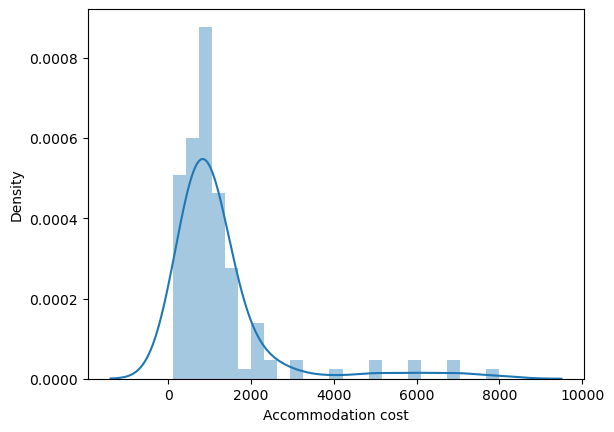

In [10]:
sns.distplot(df_travel['Accommodation cost'], bins=25)

C:\Users\makay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Transportation cost', ylabel='Density'>

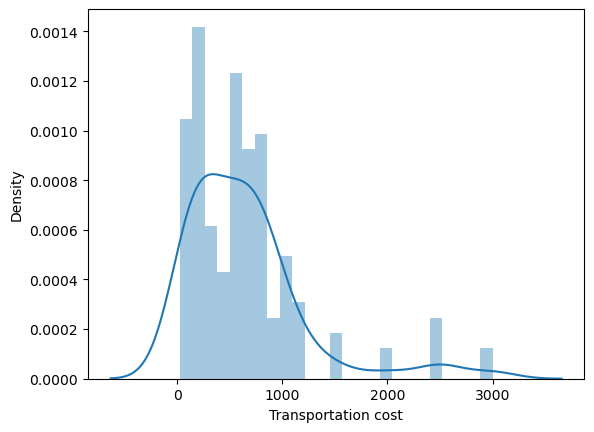

In [11]:
sns.distplot(df_travel['Transportation cost'], bins=25)

No values extreme enough to remove from charts above

In [12]:
#creating subset for pairplot
sub = df_travel[['Duration (days)','Traveler age','Accommodation cost','Transportation cost']]

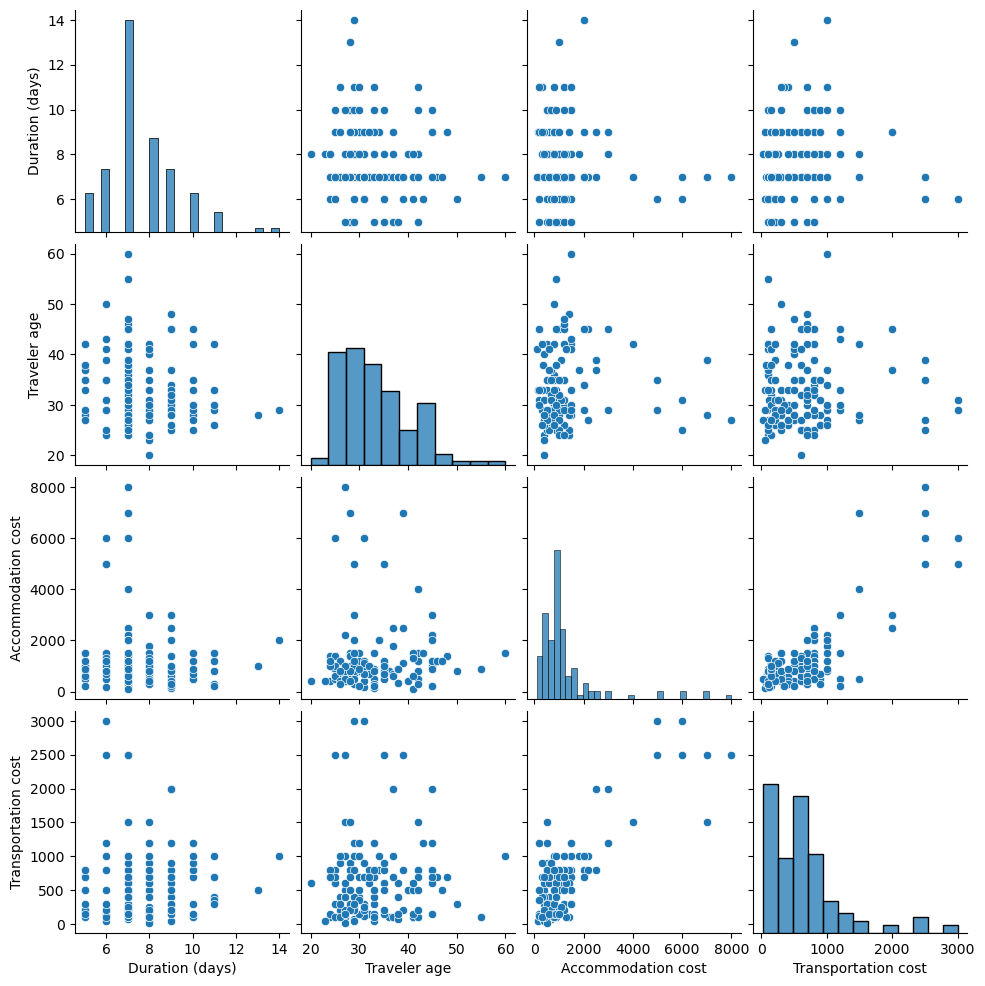

In [13]:
#creating pairplot
g = sns.pairplot(sub)

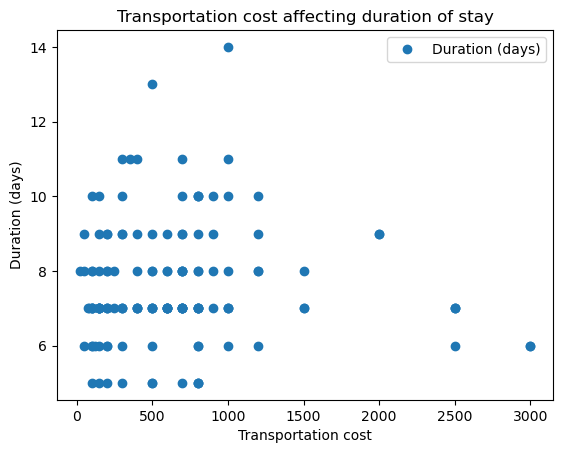

In [14]:
#Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_travel.plot(x = 'Transportation cost', y='Duration (days)',style='o') 
plt.title('Transportation cost affecting duration of stay')  
plt.xlabel('Transportation cost')  
plt.ylabel('Duration (days)')  
plt.show()

In [15]:
regression = LinearRegression()

Getting rid of NaN values for regression analysis

In [16]:
df_travel['Transportation cost'].isnull().sum()

1

In [17]:
df_travel['Transportation cost'] = df_travel['Transportation cost'].fillna(0)

In [18]:
df_travel['Transportation cost'].isnull().sum()

0

In [19]:
df_travel['Duration (days)'].isnull().sum()

0

In [20]:
#Reshape the variables into NumPy arrays and put them into separate objects.
X = df_travel['Transportation cost'].values.reshape(-1,1)
y = df_travel['Duration (days)'].values.reshape(-1,1)

In [21]:
X

array([[ 600.],
       [ 500.],
       [ 700.],
       [1000.],
       [ 200.],
       [ 800.],
       [1200.],
       [ 600.],
       [ 200.],
       [ 800.],
       [ 500.],
       [ 100.],
       [1200.],
       [ 700.],
       [ 400.],
       [ 150.],
       [ 400.],
       [ 700.],
       [ 150.],
       [ 800.],
       [ 100.],
       [ 600.],
       [  80.],
       [ 500.],
       [ 100.],
       [ 800.],
       [ 150.],
       [ 500.],
       [ 150.],
       [ 300.],
       [ 500.],
       [  50.],
       [ 600.],
       [ 100.],
       [ 800.],
       [ 120.],
       [ 400.],
       [  75.],
       [ 600.],
       [ 150.],
       [ 900.],
       [ 800.],
       [ 700.],
       [ 100.],
       [ 600.],
       [ 500.],
       [  50.],
       [ 150.],
       [ 700.],
       [ 300.],
       [ 100.],
       [ 200.],
       [ 800.],
       [ 150.],
       [  50.],
       [ 200.],
       [ 250.],
       [  20.],
       [ 300.],
       [ 100.],
       [ 800.],
       [ 300.],
       [

In [22]:
y

array([[ 7],
       [ 5],
       [ 7],
       [14],
       [ 7],
       [ 5],
       [10],
       [ 7],
       [ 7],
       [ 7],
       [ 7],
       [ 7],
       [ 8],
       [ 9],
       [ 7],
       [ 7],
       [ 9],
       [10],
       [ 6],
       [10],
       [ 5],
       [ 7],
       [ 7],
       [ 8],
       [ 6],
       [ 9],
       [ 8],
       [ 8],
       [ 7],
       [ 9],
       [13],
       [ 9],
       [ 8],
       [ 7],
       [10],
       [ 6],
       [ 8],
       [ 7],
       [ 7],
       [ 7],
       [ 8],
       [ 7],
       [ 7],
       [ 7],
       [ 7],
       [ 7],
       [ 6],
       [ 7],
       [ 8],
       [ 7],
       [10],
       [ 7],
       [ 7],
       [ 9],
       [ 8],
       [ 8],
       [ 8],
       [ 8],
       [ 7],
       [ 8],
       [ 6],
       [ 7],
       [ 9],
       [ 6],
       [ 7],
       [ 7],
       [ 6],
       [ 6],
       [ 8],
       [ 6],
       [ 8],
       [ 7],
       [ 8],
       [ 7],
       [ 7],
       [ 9],
       [ 7],

In [23]:
#Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis

In [25]:
#Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [26]:
#Predict the values of y using X.
y_predicted = regression.predict(X_test)

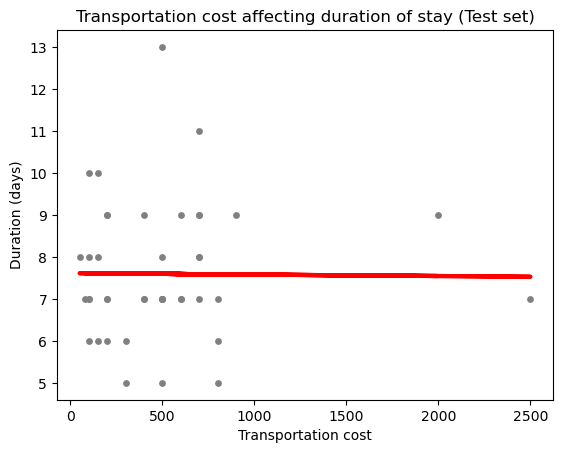

In [27]:
#Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Transportation cost affecting duration of stay (Test set)')
plot_test.xlabel('Transportation cost')
plot_test.ylabel('Duration (days)')
plot_test.show()

The line from just looking at it doesn't seem to have a definite positice or negative trend it seems to be going straight across.

In [28]:
#Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted) 

In [29]:
#Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-3.40646968e-05]]
Mean squared error:  2.568249960731404
R2 score:  -0.002077622368988452


Slope in indicating that there is a negative relationship between varibales as transportation cost rises the duration of the trip drops. 

 small MSE of  2.5, means that the regression line passes fairly close to the observations, making it a good fit

With the R2 score being negative this indicates that this model fits worse than a horizontal line 

In [32]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_test.flatten()})
data.head(30)

,Actual,Predicted
0,8,8
1,7,7
2,6,6
3,7,7
4,7,7
5,9,9
6,7,7
7,10,10
8,7,7
9,6,6


Actual and predicted are the same value for each, this helps show the accuracy of the model. Just looking at the chart did not give enough details on the relationship so i believe running the additional analysis of the slope, mse, and R2 really helped me understand what relationship these 2 variable have to each other.